# 2T_데이터 크롤링 유형 (2)-동적인 웹사이트의 데이터 수집하기 ( requests, json )

* 위에는 정적인 사이트(HTML) -> requests 요청을 보내고, bs4로 데이터를 파싱하고
* 동적인 사이트는 ajax를 이용해서 비동기적으로 데이터를 불러오는 경우; 즉 API가 있는 경우에 사용할 수 있는 방법 => 동일하게 requests로 요청을 보냈는데 데이터 자체가 .json(javascript object notation)형태로 양식이 오다 보니까 직접 파싱 하는 게 아니라 제이슨 모듈을 가지고 바로 파싱을 해 버릴 수가 있었다.

In [2]:
import requests
import json

In [3]:
response = requests.get("https://watcha.net/home/news.json?page=1&per=15")

In [5]:
# response.text => 데이터가 많이 들어있기는 하지만, str 일 뿐이다!

In [6]:
watchat_dict = json.loads(response.text)   # loads => STR => DICT

In [8]:
len(watchat_dict), len(watchat_dict["news"])

(1, 15)

In [9]:
watchat_dict["news"][0]

{'content': '[caption id="attachment_248594" align="aligncenter" width="665"]수어사이드 스쿼드[/caption]\n\n최강 악당팀으로 히어로 영화의 새 판을 짜겠다고 선언했던 <수어사이트 스쿼드>가 드디어 언론 시사를 마쳤다. 과연 소문난 잔치, 그만큼의 먹을 게 있을까?\n\n캐릭터가 다했다.자살 특공대라는 이름으로 묶인 각양각색 악당들의 개성이 영화의 시작과 끝을 책임진다. 흔한 히어로 무비에서 하나 나올까말까 한 악당들의 면면은 흥미롭지만, 이를 설명하듯 늘어놓는 방식이 조금 지루하다. 절정에 치달을 때까지 시선을 붙들어 맬 이야기 전개도 산만한 편. 조커(자레드 레토)의 출연 분량은 적지만 할리퀸(마고 로비)와 함께 할 때의 기괴한 합은 매력적이다. 차지수 기자\n\n나쁜 놈들 매운맛 1단계.엄청나게 악랄한 나쁜 놈들을 기대했다면 15세 관람가 등급이라는 걸 기억하자. 데드샷(윌 스미스)의 가족사와 조커와 할리퀸의 연애사를 듣다 보면 눈물날 지경. 등장 인물이 많아서 <배트맨 대 슈퍼맨: 저스티스의 시작>처럼 캐릭터 소개하기 바쁘지만, 정작 영화는 몇몇 캐릭터에 집중되어 있다. 하지만 진지함에 목숨 걸었던 DC가 작정하고 유머 감각을 선보인 시도가 돋보인다. 박경희 기자\n\nDC의 청신호.캐릭터 특징만큼은 확고히 다져넣었다. 여기에 히트 넘버로 구성된 OST가 쿨한 매력을 더하고, 선명한 색감과 미니멀한 그래픽으로 캐릭터의 자유분방한 개성을 확실히 보여준다. 하지만 악당들의 통쾌한 액션 쾌감은 기대보다 덜하다. 이 슈퍼 악당들이 ‘슈퍼 히어로는 절대 못할 특수 미션’에 성공했다고 말하긴 어렵지만, 매력 방출 미션만은 제대로 해 냈다. 양보연 기자\n\n섹시하지만 지루하다.‘악질 중의 악질들만 모아 더 큰 악과 싸운다’는 설정은 그 자체로 섹시했다. 악당들의 죄목과 특기를 빠르게 훑는 영화 초반은 세련되게 시선을 끌지만, 전투 신이 길어지면서 이내 지루해져버린다. 조커와 할리퀸의 애증섞인 사랑

In [10]:
watchat_dict["news"][0]["title"]

'<수어사이드 스쿼드> 보자마자 “할리퀸과 조커는 예술, 나쁜 놈들 매운 맛은 1단계 ”'

In [11]:
# JSON => json.loads(...), json.dumps(...)

# 1. loads => STR => DICT
# 2. dumps => DICT => STR

In [14]:
title_list = [
    news["title"]  #news에 대한 타이틀을 뽑으면
    for news       #하나의 news들에 대해서 
    in watchat_dict["news"]
]

updated_at_list = [
    news["updated_at"]
    for news
    in watchat_dict["news"]
]

title_list, updated_at_list

(['<수어사이드 스쿼드> 보자마자 “할리퀸과 조커는 예술, 나쁜 놈들 매운 맛은 1단계 ”',
  '<인천상륙작전> 이정재 인터뷰 | 그럼에도 불구하고',
  '20회 BIFAN | <치하야후루> 히로세 스즈 “본능대로 하자”',
  '이번 주 뭘 볼까? | 7월 5주 극장에서 가장 보고 싶은 신작은?',
  '숨은 그 ‘님’ 찾기 (25) 김수안 | 어리다고 놀라지 말아요',
  '좀비 특집 | 좀비 재난 발생 시 대피 요령',
  '영화 상영 시각 이후 광고 상영은 위법이 아니다?',
  '좀비 특집 | 좀비 아포칼립스의 시대 ',
  '美박스오피스 | 트레키의 열광 본격 시동, <스타트렉 비욘드> 1위',
  '韓 박스오피스 | 눈 뜨면 신기록 <부산행>, 500만 돌파',
  '올 여름 극장가를 뒤집을, 스타일리시 다크호스 등장',
  '부산 독립 만세! 부산국제영화제, 정관 개정안 임시총회 통과',
  "폭주하는 <부산행>열차, 한국 영화 중 가장 빠른 손익분기점'행'",
  '7월 3주차 <부산행>맥스 위클리 리뷰',
  '<인천상륙작전>보자마자 리뷰'],
 ['2016-08-09T04:00:44+09:00',
  '2016-08-17T12:01:16+09:00',
  '2016-08-17T12:01:16+09:00',
  '2016-07-25T19:00:49+09:00',
  '2016-07-25T18:01:30+09:00',
  '2016-07-25T19:00:49+09:00',
  '2016-07-25T17:00:47+09:00',
  '2016-07-25T15:01:40+09:00',
  '2016-07-25T11:00:46+09:00',
  '2016-07-25T11:00:46+09:00',
  '2016-08-12T10:01:07+09:00',
  '2016-07-23T20:00:50+09:00',
  '2016-07-23T13:00:48+09:00',
  '2016-07-21T16:00:48+09:00',
  '2016-07-20T22

### 1. API 주소를 찾아내는 방법 ( 직방, 왓챠, ... => 쉽게 되는 애들 // 다방 => 약간 어려울 수 있는 애들 => selenium 이나 다른 방법을 통해서... )
### 2. json -> dict 로 변경해서 ( json.dumps(...) ) => 이걸 이용해서 우리가 원하는 데이터만 가져오는 방법. 이 방법들로 거의 다 해결할 수 있다.
### 3. 단, 로그인이 필요한 애들은 "현재로써는" 불가능합니다.

---
### 1. HTML. 이 경우가 훨씬 많으니까 많이 이용하게 될 것이다.
### 2. API JSON ( 앱 서비스가 있는 경우의 애들은 가능성이 높다 ) => 난이도가 쉽습니다. API가 있다면 API를 잘 찾아서 하는 것도 중요하다.
### 3. 가능하면 이렇게 까지 안하면 좋지만, 어쩔 수 없이 브라우저를 직접 켜야 하는 경우에는 (selenium)을 쓸 것이다.
---

# 3T_데이터 크롤링 유형 (3) - 웹 브라우저를 직접 이용해서 데이터 수집하기 ( selenium )

In [15]:
# 1. Firefox 
# 2. pip install selenium ( conda install selenium ) => 사용자 이름이 한글로 되어있는 경우, ..., 
# 가능하면 Docker 말고, 그냥 윈도우/맥에다가 설치해주세요.

In [16]:
from selenium import webdriver

In [17]:
driver = webdriver.Firefox()

In [20]:
# select ( 데이터를 찾는 기능 )
# click (클릭)
# send_keys ( 키 입력 )
# get (url 이동 )
# 이 기능들만 알고 있으면 모든 작업을 할 수 있다.

In [21]:
driver.get("http://naver.com")   # .get 으로 주소 이동

In [22]:
# bs4 => select(_one)
# selenium => find_element(s)_by_css_selector

In [26]:
rank_elements = driver.find_element_by_css_selector("#realrank").find_elements_by_css_selector("a")
#a태그를 찾으면 10개가 나온다.

In [27]:
rank_element = rank_elements[0]

In [28]:
rank_element.text

'이대훈\n상승\n84'

In [29]:
for rank_element in rank_elements:
    print(rank_element.text)

이대훈
상승
84
유승민
상승
126
유인나
상승
210
오승은
NEW
최재원
상승
153
내귀에캔디
상승
162
손연재
상승
54
외모지상주의
상승
66
박인비
상승
93
박주봉
상승
195



* tag.class#id => css selector ( CSS 선택자로 선택한다. )
* select는 위와 같은 방식을 그대로 쓰고 있는 것이다.
* find_elements_by_css_selector(셀레니움 방식)

### 네이버 아이디, 비번 입력 로그인

In [33]:
driver.find_element_by_css_selector("#id").send_keys("kimkipoy")

In [34]:
driver.find_element_by_css_selector("#pw").send_keys("sksmssrlarlvydlqslek")

In [35]:
driver.find_element_by_css_selector(".btn_login").click()

### 다방 실습

In [36]:
from selenium import webdriver

In [37]:
driver = webdriver.Firefox()

In [38]:
# get
# find_elements_by_css_selector
# send_keys => 이번에는 안 쓰인다.
# click

# 매물을 들어가서 => 매물 연락처를 크롤링하자.
# API 를 쓰지 않습니다.

In [39]:
#스크린샷 기능
from IPython.display import Image  # 해당 웹 주소 출력
Image("웹주소")

In [40]:
driver.get("http://www.dabangapp.com/search#/map?id=&type=search&filters=%7B%22deposit-range%22%3A%5B0%2C999999%5D%2C%22price-range%22%3A%5B0%2C999999%5D%2C%22room-type%22%3A%5B0%2C1%2C2%2C3%2C4%2C5%5D%2C%22deal-type%22%3A%5B0%2C1%5D%2C%22location%22%3A%5B%5B126.91642697330576%2C37.52111436323831%5D%2C%5B127.07195218082529%2C37.59487095070929%5D%5D%7D&position=%7B%22center%22%3A%5B126.99418957706553%2C37.55800178295364%5D%2C%22zoom%22%3A13%7D&cluster=%7B%7D")

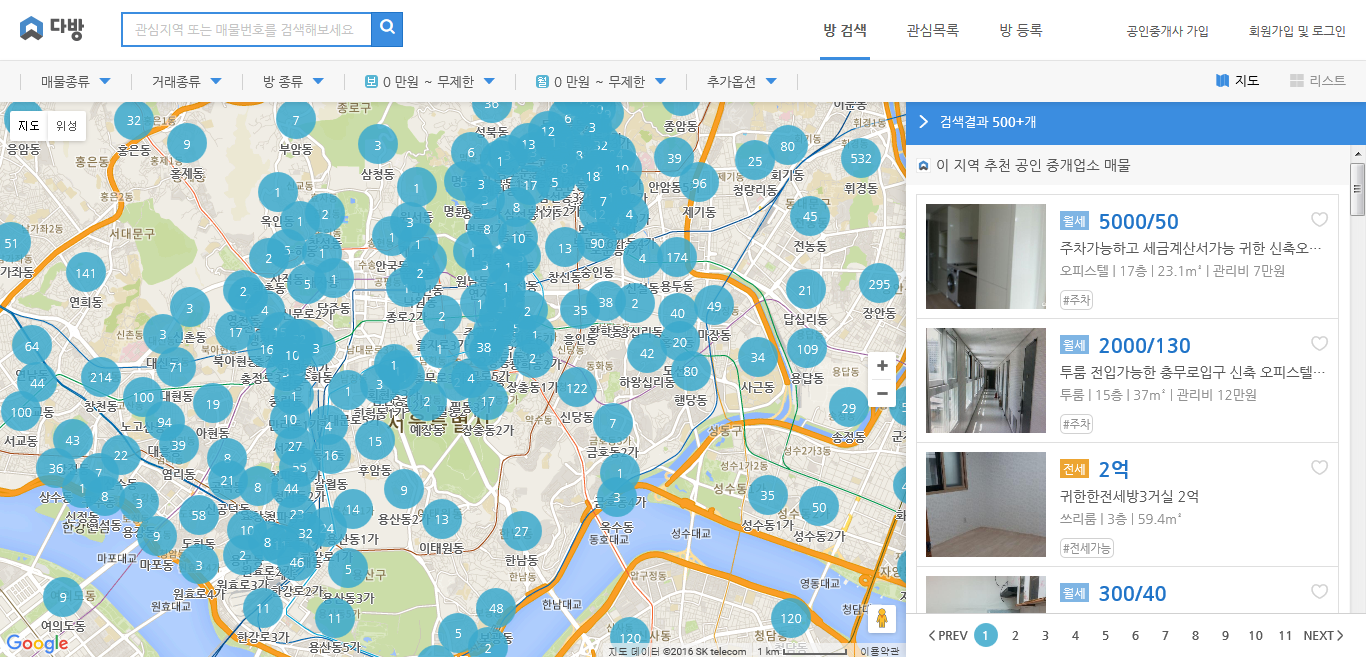

In [41]:
Image(driver.get_screenshot_as_base64())  

In [42]:
# driver.get_screenshot_as_base64()  => 오래 걸린다. 긴 text가 나오는데 사실 이미지다. 가능하면 하지 마세요.

In [43]:
item_elements = driver.find_elements_by_css_selector("li.Room-item")

In [44]:
len(item_elements)

38

In [45]:
item_element = item_elements[0]

In [46]:
a_element = item_element.find_element_by_css_selector("a")

In [47]:
a_element.get_attribute("href")

'http://www.dabangapp.com/room/57b50c14137b7d289968654a'

In [48]:
for item_element in item_elements:
    url = item_element.find_element_by_css_selector("a").get_attribute("href")
    print(url)
#방 정보 url 출력

http://www.dabangapp.com/room/57b50c14137b7d289968654a
http://www.dabangapp.com/room/5795f76daccc90470b5b281a
http://www.dabangapp.com/room/57b5771bd5b18a08ca8fbdab
http://www.dabangapp.com/room/57b3c80b6e97a64ff910f1d6
http://www.dabangapp.com/room/57b57ffb1f145825c8959e1e
http://www.dabangapp.com/room/574c0d07d122380459b7a52f
http://www.dabangapp.com/room/57b536dda16af71078a083ac
http://www.dabangapp.com/room/5768171471dd14602110e1ac
http://www.dabangapp.com/room/57961dfba723974525b63a74
http://www.dabangapp.com/room/5576ee4be4b00d5e7cec1b7d
http://www.dabangapp.com/room/57a978921383692e13251e96
http://www.dabangapp.com/room/579988232349c37d7bc5a368
http://www.dabangapp.com/room/579ffcbfd38a3b4c2131389e
http://www.dabangapp.com/room/554c544fe4b0a17d37b718c6
http://www.dabangapp.com/room/5764e8e593285c1285ee0460
http://www.dabangapp.com/room/57b27cc6f2c23a478f31d0dc
http://www.dabangapp.com/room/57981d079d2fc926696d914a
http://www.dabangapp.com/room/57b299f80f93836adc0f5c69
http://www

In [52]:
# 주소가 있다고 가정하고, 하나를 들어가서 핸드폰 번호 크롤링
url = "http://www.dabangapp.com/room/57b299f80f93836adc0f5c69"
driver_for_detail_page = webdriver.Firefox()

In [53]:
#웹 페이지 뜨고
driver_for_detail_page.get(url)

In [54]:
button_element = driver_for_detail_page.find_element_by_css_selector("div.contact-view-button-wrap")
button_element.click()   #비공개일 경우에 클릭창이 없어서 에러가 날 수 있다.

In [55]:
driver_for_detail_page.find_element_by_css_selector(".agent-name-wrap span.number").text

'연락처 : 010-6650-2002'

In [56]:
driver_for_detail_page.find_element_by_css_selector("span.number").text.split(":")[-1].strip()

'010-6650-2002'

In [57]:
driver_for_detail_page = webdriver.Firefox()

for item_element in item_elements:
    url = item_element.find_element_by_css_selector("a").get_attribute("href")
    driver_for_detail_page.get(url)
    
    # 연락처 보기 버튼 찾아서 클릭
    button_element = driver_for_detail_page.find_element_by_css_selector("div.contact-view-button-wrap")
    button_element.click()

    # 핸드폰 번호 뽑는 녀석
    phonenumber = driver_for_detail_page.find_element_by_css_selector(".agent-name-wrap span.number")\
        .text.split(":")[-1]\
        .strip()
        
    print(phonenumber)
    
#크롤링 계속 하면 막힐 수도 있습니다... ㅠㅠ

010-9959-2255
010-9959-2255
010-2748-2563
010-2748-2563
010-4330-5501
010-4330-5501
010-5713-5724
010-5713-5724
01032557265
01032557265
010-5774-7375
010-5774-7375
010-9194-2479
010-9194-2479
01097280042
010-5003-7177
010-3772-7618
010-6650-2002
010-4423-0112
010-3038-7399
010-8191-6075
010-9665-9127
010-4575-7800
010-2255-0139
010-2226-7863
010-8322-8224
010-2477-9005
010-4703-6897
010-5852-1711
010-3038-7399
01030162361
010-9170-0703
010-6305-1300
010-6409-4259
01093123568
010-4895-4085
01087436519
010-4423-0112


### PhantomJS

In [60]:
# headless browser. 서버에서 돌아가게 브라우저가 안 뜨는 브라우저가 있다. 내부적으로만 뜬다.
driver = webdriver.PhantomJS()

In [61]:
driver.get("http://fastcampus.co.kr")

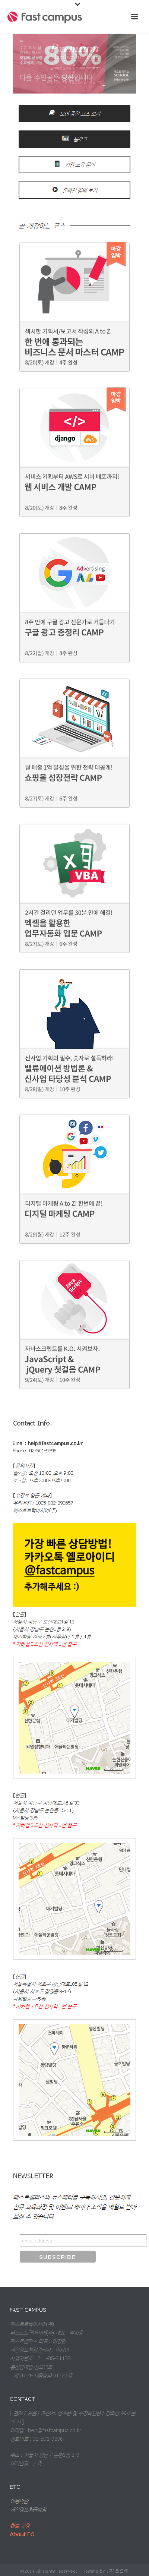

In [62]:
Image(driver.get_screenshot_as_base64())   #이렇게 스크린샷으로 하나하나 확인해야 한다.

In [65]:
# Firefox 실험/테스트를 해보고
# 코드 => 리팩토링 => PhantomJS => 서버에서 주기적으로 돌린다.
# 만약에 자동화하고 크롤링 돌릴게 많다면 이 방법으로 

#### 스크린샷 번외

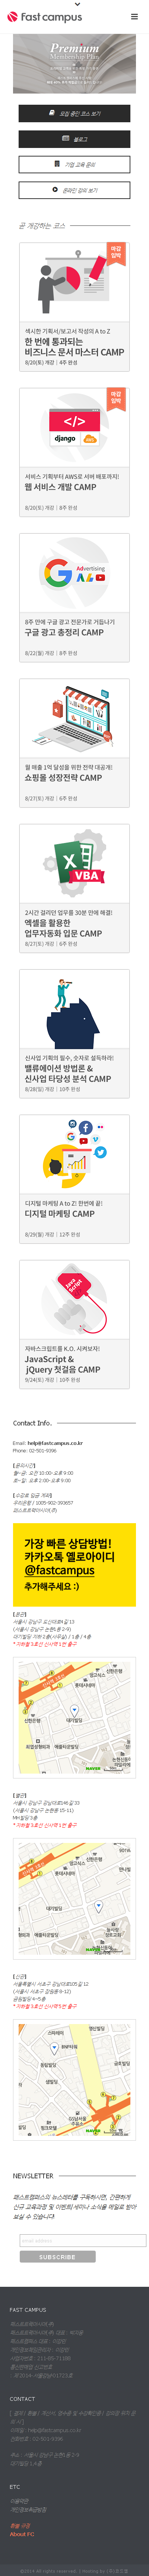

In [63]:
driver.get("http://fastcampus.co.kr")
Image("http://cdn.www.fastcampus.co.kr/wp-content/uploads/2015/10/HL_fin_camp_hedgefund.png")
Image(driver.get_screenshot_as_base64())  #스크린샷을 찍어주는 기능

In [64]:
from IPython.display import IFrame
IFrame("http://fastcampus.co.kr", width=400, height=300)   #이 안에서 웹 주소 띄우는 것